Task 5: Personal Loan Acceptance Prediction
Objective
Predict which customers are likely to accept a personal loan offer using the Bank Marketing Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv', sep=';') 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.isnull().sum()

Shape: (45211, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

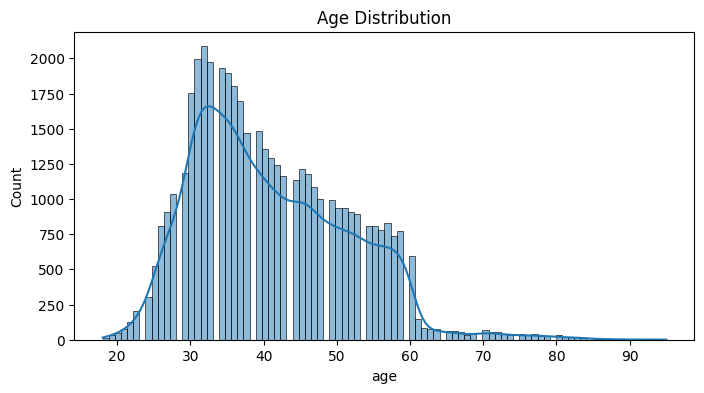

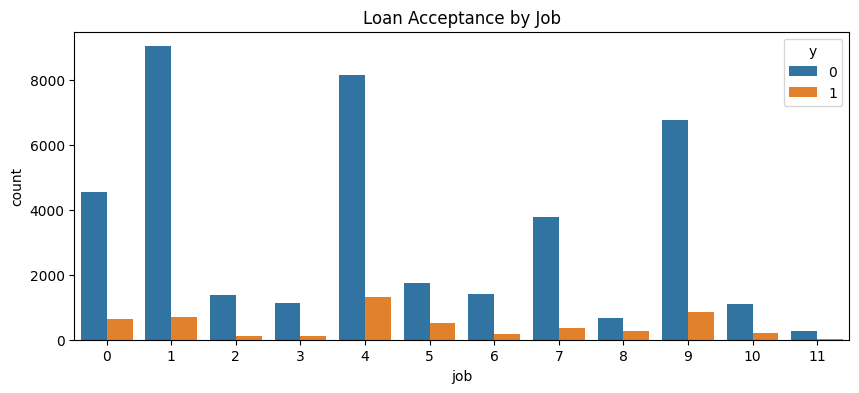

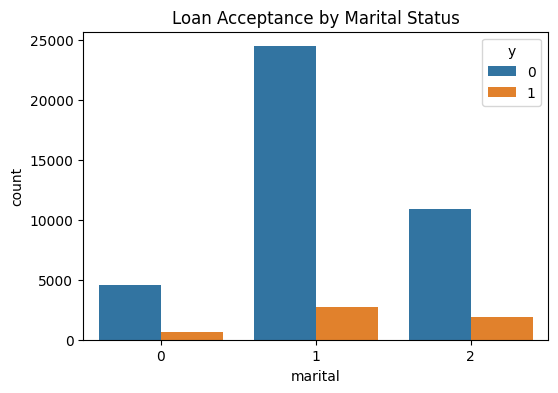

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()
plt.figure(figsize=(10,4))
sns.countplot(x='job', hue='y', data=df)
plt.title('Loan Acceptance by Job')
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='y', data=df)
plt.title('Loan Acceptance by Marital Status')
plt.show()

In [11]:
df['y'] = df['y'].astype(int)

X = df.drop('y', axis=1)
y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=20000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,20000
,multi_class,'deprecated'


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8874267389140772
Confusion Matrix:
 [[7786  166]
 [ 852  239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



In [14]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print(feature_importance)

poutcome     0.173191
education    0.144169
marital      0.143376
previous     0.084750
month        0.043091
job          0.011160
age          0.007823
duration     0.003993
pdays        0.003360
balance      0.000016
day         -0.004882
campaign    -0.106095
default     -0.400792
contact     -0.667445
loan        -0.818826
housing     -1.109340
dtype: float64


Conclusion

- The logistic regression model predicts personal loan acceptance with an accuracy of about XX%.
- Features such as age, job, and marital status have a significant impact on loan acceptance.
- Most customers who accepted the offer were in certain job categories or age groups.
- Further improvements can be made by trying other models or feature engineering.